In [5]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [6]:
## importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## data preprocessing


In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


### validation image preprocessing

In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


## structure of our training set

In [9]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [10]:
for x, y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[131.   121.   120.  ]
   [121.   111.   110.  ]
   [126.75 116.75 115.75]
   ...
   [150.25 141.25 144.25]
   [156.75 147.75 150.75]
   [155.5  146.5  149.5 ]]

  [[130.5  120.5  119.5 ]
   [124.75 114.75 113.75]
   [116.25 106.25 105.25]
   ...
   [160.75 151.75 154.75]
   [160.5  151.5  154.5 ]
   [156.75 147.75 150.75]]

  [[125.75 115.75 114.75]
   [125.75 115.75 114.75]
   [130.25 120.25 119.25]
   ...
   [153.5  144.5  147.5 ]
   [159.   150.   153.  ]
   [163.5  154.5  157.5 ]]

  ...

  [[125.   116.   119.  ]
   [122.25 113.25 116.25]
   [117.75 108.75 111.75]
   ...
   [162.   156.   160.  ]
   [157.25 151.25 155.25]
   [166.5  160.5  164.5 ]]

  [[112.5  103.5  106.5 ]
   [124.25 115.25 118.25]
   [115.25 106.25 109.25]
   ...
   [155.25 149.25 153.25]
   [167.   161.   165.  ]
   [158.75 152.75 156.75]]

  [[123.5  114.5  117.5 ]
   [113.5  104.5  107.5 ]
   [120.25 111.25 114.25]
   ...
   [167.75 161.75 165.75]
   [156.   150.   154.  ]
   [161.25 155.25 15

## To avoid overshooting
1) choose small learning rate, default is 0.001 and we are taking 0.0001
2) there may be chance of underfitting so increase the so increase number of neurons
3) add more convulutional layer to extract more feature from images  there may be possibility that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature. 

## Building model

In [22]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [23]:
model = Sequential()

In [74]:
## building convulutiona layer

In [25]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [26]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [27]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [28]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [29]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [30]:
model.add(Dropout(0.25)) ## to avoid overfitting

In [31]:
model.add(Flatten())

In [32]:
model.add(Dense(units=1500,activation='relu'))

In [33]:
model.add(Dropout(0.4))

In [34]:
#output layer
model.add(Dense(units=38,activation='softmax'))

## Compiling model

In [48]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("C:/Users/91961/Downloads/plant disease/trained_model.keras")
print(model.summary())


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,685,526 (59.84 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,842,764 (29.92 MB)

None


## Model Training

In [ ]:
trainig_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5022s 2s/step - accuracy: 0.4040 - loss: 5.4060 - val_accuracy: 0.7066 - val_loss: 1.0525
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4959s 2s/step - accuracy: 0.7562 - loss: 0.9054 - val_accuracy: 0.8235 - val_loss: 0.6192
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4953s 2s/step - accuracy: 0.7547 - loss: 1.0043 - val_accuracy: 0.7910 - val_loss: 0.7948
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5020s 2s/step - accuracy: 0.7120 - loss: 1.2718 - val_accuracy: 0.6222 - val_loss: 1.3364
Epoch 5/10
 595/2197 ━━━━━━━━━━━━━━━━━━━━ 1:14:32 3s/step - accuracy: 0.6499 - loss: 1.6008

## model evaluation

In [50]:
## model evaluation on trainingset
train_loss,train_acc = model.evaluate(training_set)

1161/2197 ━━━━━━━━━━━━━━━━━━━━ 9:48 568ms/step - accuracy: 0.0857 - loss: 3.4668

KeyboardInterrupt: 

In [89]:
print(train_loss,train_acc)

0.018000958487391472 0.9942670464515686


In [90]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 349s 635ms/step - accuracy: 0.9744 - loss: 0.0844


In [95]:
print(val_loss,val_acc)

0.0915934145450592 0.97257000207901


## Saving model

In [18]:
model.save("trained_model.keras")

In [20]:
trainig_history.history

NameError: name 'trainig_history' is not defined

In [102]:
#recording history in json
import json
with open("trainig_hist.json","w") as f:
    json.dump(trainig_history.history,f)

In [16]:
trainig_history.history['accuracy']

NameError: name 'trainig_history' is not defined

In [15]:
trainig_history.history['accuracy']

NameError: name 'trainig_history' is not defined

## accuracy visualization


In [24]:
import os
print(os.path.exists("trainig_hist.json"))  # Should print True if the file exists


True


In [25]:
import json

# Load the training history from the saved JSON file
with open("trainig_hist.json", "r") as f:
    trainig_history = json.load(f)


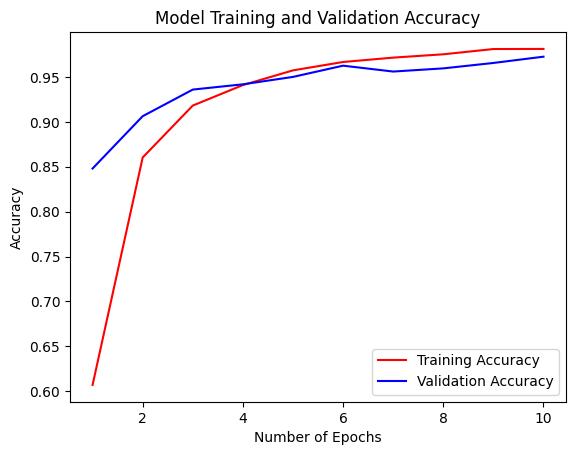

In [27]:
# Generate a list of epochs
epochs = [i for i in range(1, len(trainig_history['accuracy']) + 1)]

# Plot training and validation accuracy
plt.plot(epochs, trainig_history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, trainig_history['val_accuracy'], color='blue', label='Validation Accuracy')

# Add labels, title, and legend
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Model Training and Validation Accuracy")
plt.legend()
plt.show()


In [28]:
'''epochs = [i for i in range (1,11)]
plt.plot(epochs,trainig_history.history['accuracy'],color='red', label='Trainig_accuracy')
plt.plot(epochs,trainig_history.history['val_accuracy'],color='blue', label='validation_accuracy')
plt.xlabel("no of epochs")
plt.ylabel("accuracy result")
plt.title("visualization of result")
plt.legend()
plt.show()'''

AttributeError: 'dict' object has no attribute 'history'

## some other metrices for model evaluation

In [29]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [32]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


## preprocessing of data that we have done to calculate precision ,recall and f1 score

In [33]:
y_pred = model.predict(test_set)
y_pred

550/550 ━━━━━━━━━━━━━━━━━━━━ 313s 570ms/step


array([[9.99998808e-01, 8.39581332e-07, 1.52078639e-09, ...,
        3.45840605e-14, 7.53366265e-15, 1.07140414e-12],
       [9.99999285e-01, 6.28911948e-07, 4.83937723e-10, ...,
        1.19625948e-13, 1.86505932e-14, 1.26194714e-11],
       [1.00000000e+00, 1.19894956e-08, 1.34030911e-11, ...,
        1.36096847e-16, 3.05983823e-16, 4.01396337e-13],
       ...,
       [1.39655698e-09, 7.18645195e-12, 4.34267777e-09, ...,
        8.37416681e-12, 4.00066395e-12, 9.99942183e-01],
       [1.67675387e-10, 2.87957023e-13, 3.34406253e-10, ...,
        2.91751866e-12, 1.07990732e-12, 9.99999881e-01],
       [1.11070120e-16, 1.49439302e-19, 3.38815985e-16, ...,
        2.24411128e-19, 6.81194219e-17, 1.00000000e+00]], dtype=float32)

In [34]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 319s 579ms/step


(array([[9.99998808e-01, 8.39581332e-07, 1.52078639e-09, ...,
         3.45840605e-14, 7.53366265e-15, 1.07140414e-12],
        [9.99999285e-01, 6.28911948e-07, 4.83937723e-10, ...,
         1.19625948e-13, 1.86505932e-14, 1.26194714e-11],
        [1.00000000e+00, 1.19894956e-08, 1.34030911e-11, ...,
         1.36096847e-16, 3.05983823e-16, 4.01396337e-13],
        ...,
        [1.39655698e-09, 7.18645195e-12, 4.34267777e-09, ...,
         8.37416681e-12, 4.00066395e-12, 9.99942183e-01],
        [1.67675387e-10, 2.87957023e-13, 3.34406253e-10, ...,
         2.91751866e-12, 1.07990732e-12, 9.99999881e-01],
        [1.11070120e-16, 1.49439302e-19, 3.38815985e-16, ...,
         2.24411128e-19, 6.81194219e-17, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [35]:
## argmax will go inside the y_pred and extract the max value from this and it will return the max value of that index
predicted_categories = tf.argmax(y_pred,axis=1) ## here axis=1 means return the index in columnnwise if it is 0 then rowise

In [37]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [38]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [39]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

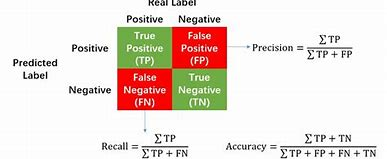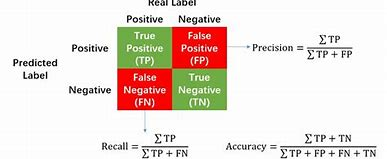

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.97      0.97       504
                                 Apple___Black_rot       0.96      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440
                                   Apple___healthy       0.99      0.89      0.94       502
                               Blueberry___healthy       0.97      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.90      0.93       410
                       Corn_(maize)___Common_rust_       0.99      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.98      0.

## confusion matrix

In [42]:
cm = confusion_matrix(y_true,predicted_categories)
cm

array([[489,   9,   0, ...,   0,   0,   0],
       [  0, 494,   0, ...,   0,   0,   0],
       [  0,   0, 432, ...,   0,   1,   1],
       ...,
       [  0,   0,   0, ..., 484,   0,   0],
       [  0,   0,   0, ...,   0, 446,   0],
       [  0,   0,   0, ...,   0,   1, 477]])

In [43]:
cm = confusion_matrix(y_true,predicted_categories)
cm.shape #38 true categories and 38 predicted categories

(38, 38)

## confusion matrix visualization

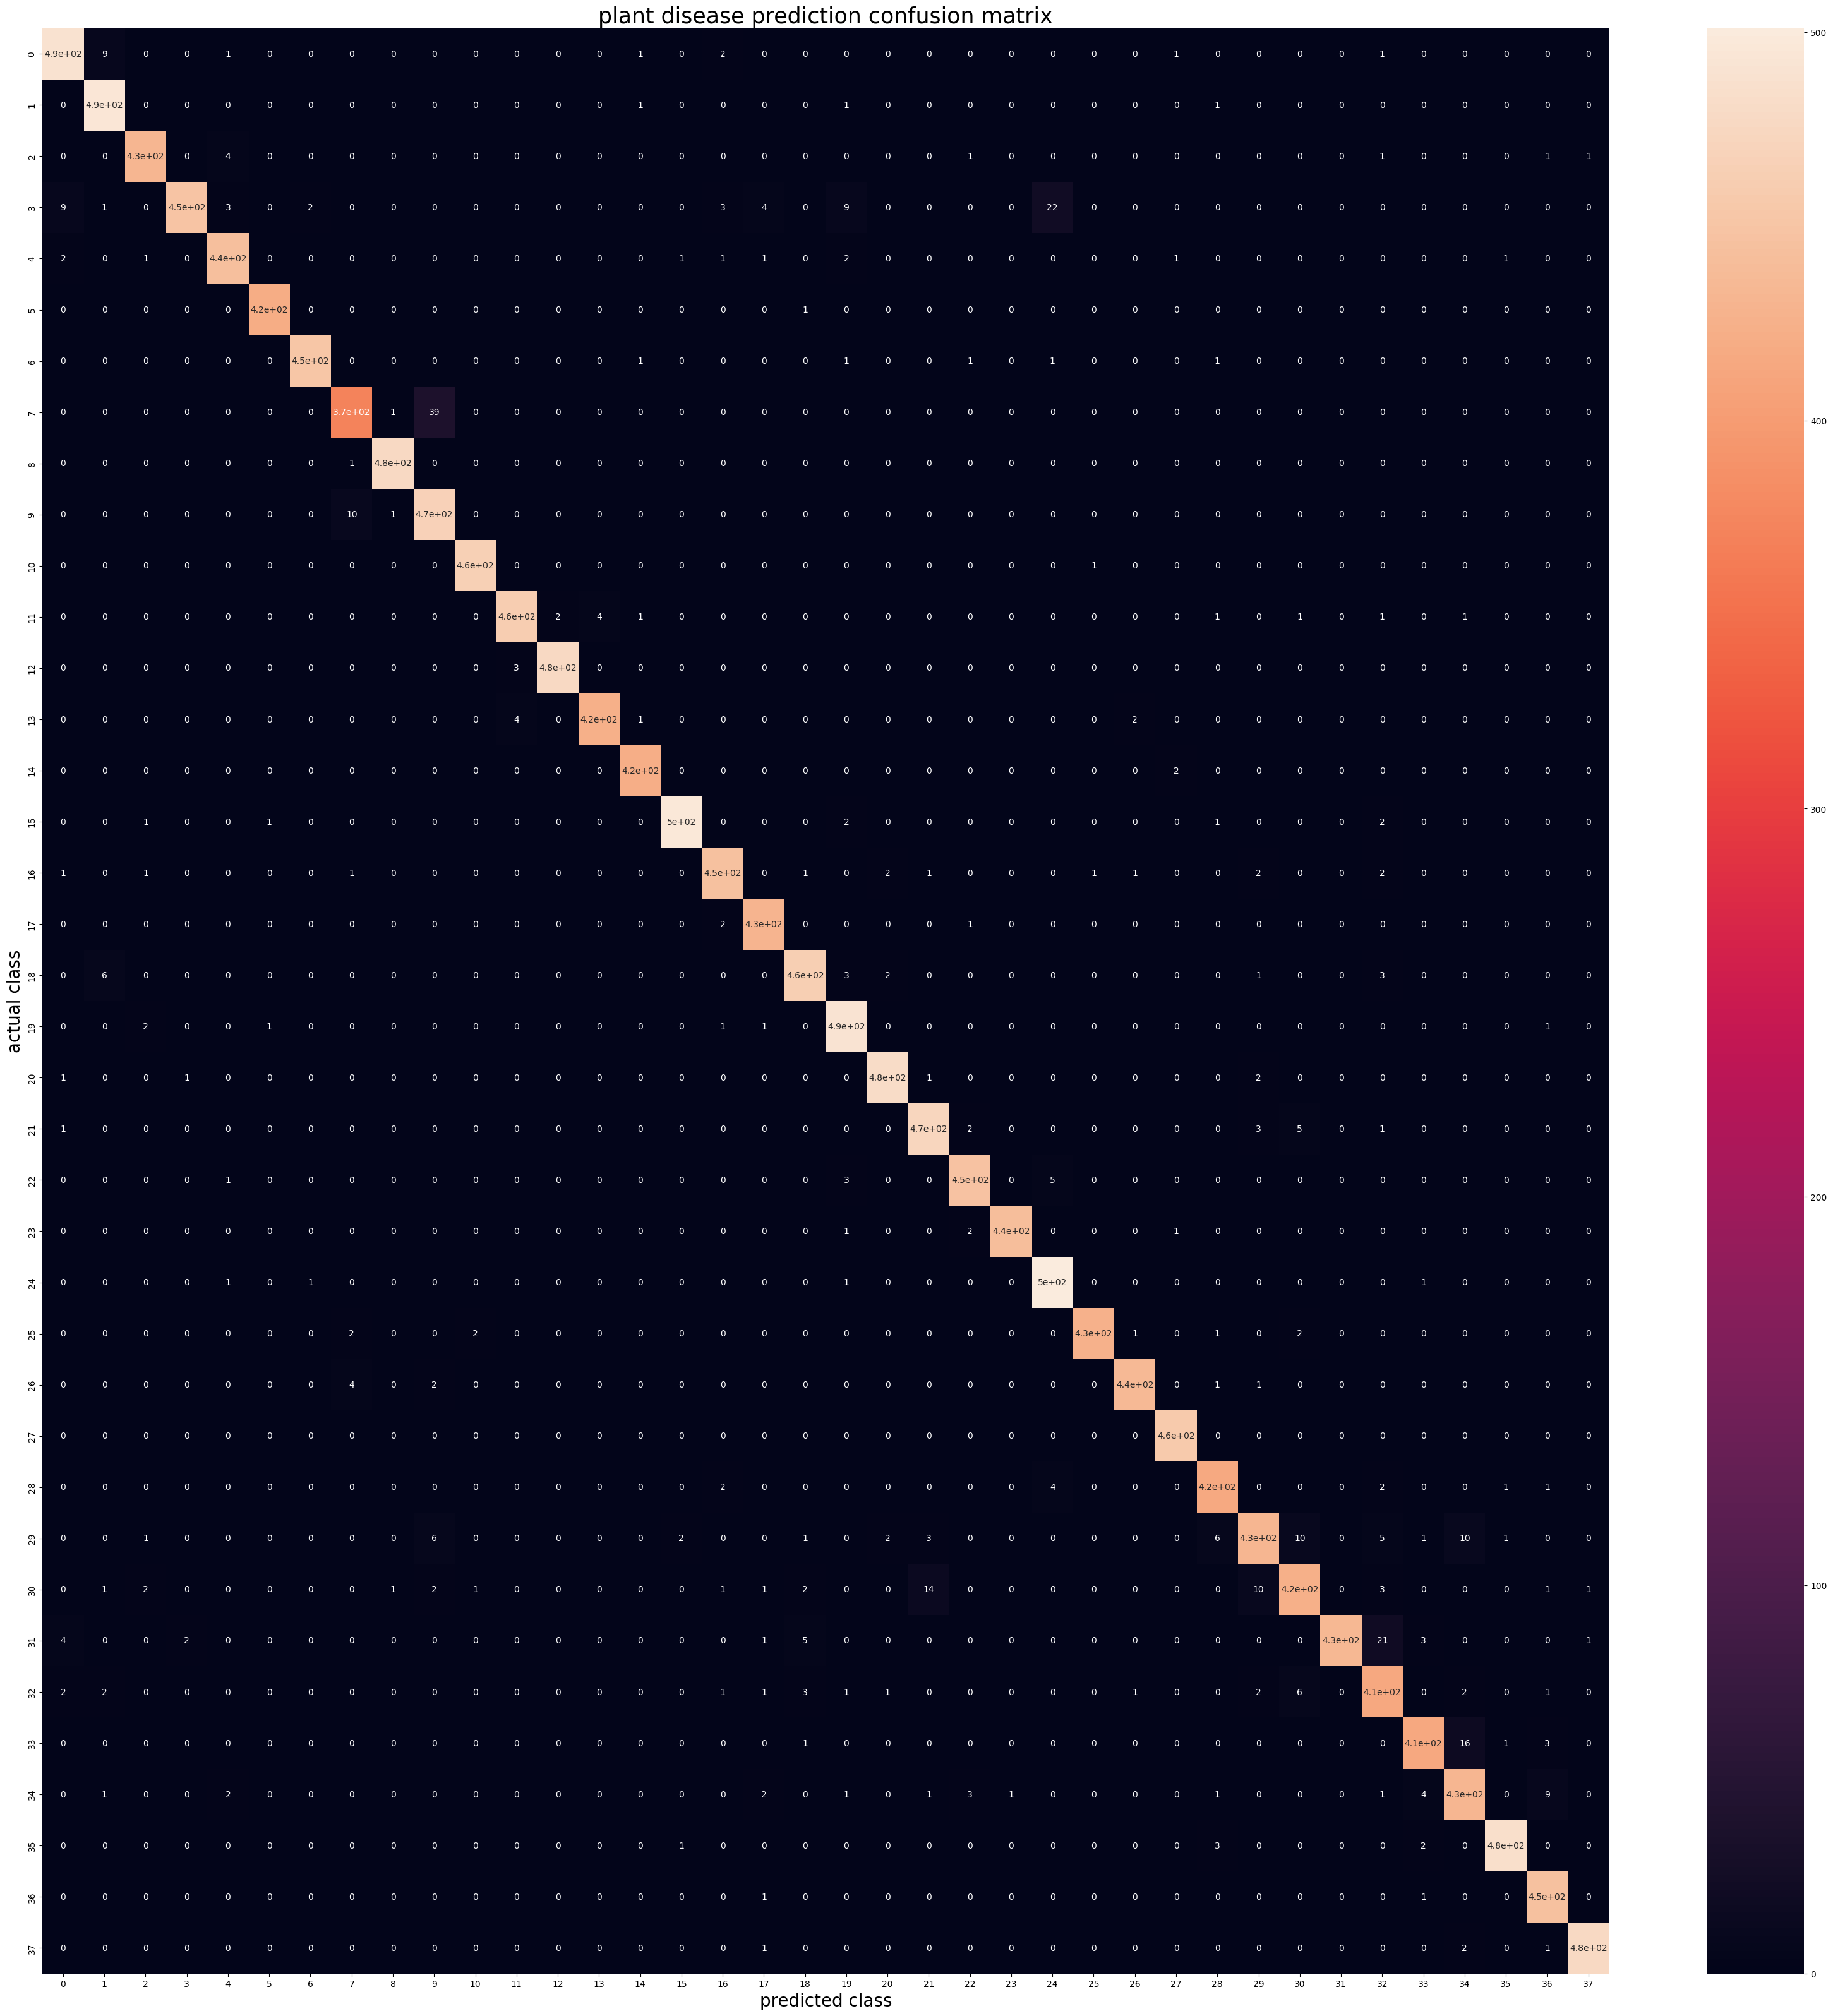

In [44]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("predicted class",fontsize=20)
plt.ylabel("actual class",fontsize=20)
plt.title("plant disease prediction confusion matrix",fontsize=25)
plt.show()